Another attempt at Ensemble regression using a more recent example...

In [21]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')







In [2]:
# SPLITTING THE DATASET
target_path = '/kaggle/input/abalone/train.csv'
test_path = '/kaggle/input/abalone/test.csv'

target = pd.read_csv(target_path)
test = pd.read_csv(test_path)

In [3]:
# One-hot encode 'Sex'
target = pd.get_dummies(target, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

In [4]:
# View the updated dataset
target.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,True,False


In [5]:
x = target.drop('Rings', axis = 1)
y = target['Rings']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
# MODELS CREATION
dtmodel = DecisionTreeClassifier()
knmodel = KNeighborsClassifier()
lrmodel= LogisticRegression()

dtmodel.fit(x_train,y_train)
knmodel.fit(x_train,y_train)
lrmodel.fit(x_train,y_train)


LogisticRegression()

In [8]:
# PREDICTION
pred1=dtmodel.predict(x_test)
pred2=knmodel.predict(x_test)
pred3=lrmodel.predict(x_test)


In [9]:
len(pred2)

18123

In [12]:
models = [{"predictions": pred1, "model": dtmodel, "name": "Decision Tree"}, 
          {"predictions": pred2, "model": knmodel, "name": "K Neighbors"},
          {"predictions": pred3, "model": lrmodel, "name": "Logistic Regression"},
         ]
models[0]

'Decision Tree'

In [10]:
pred3[:20]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [22]:
def plot_predictions(models, sample_size=10):
    x = [n for n in range(sample_size)]

    plt.figure(figsize=(10, 6))

    # plot line
    for model in models:  
        plt.plot(x, model['predictions'][:sample_size], label=model['name'])

    plt.legend()
    plt.show()

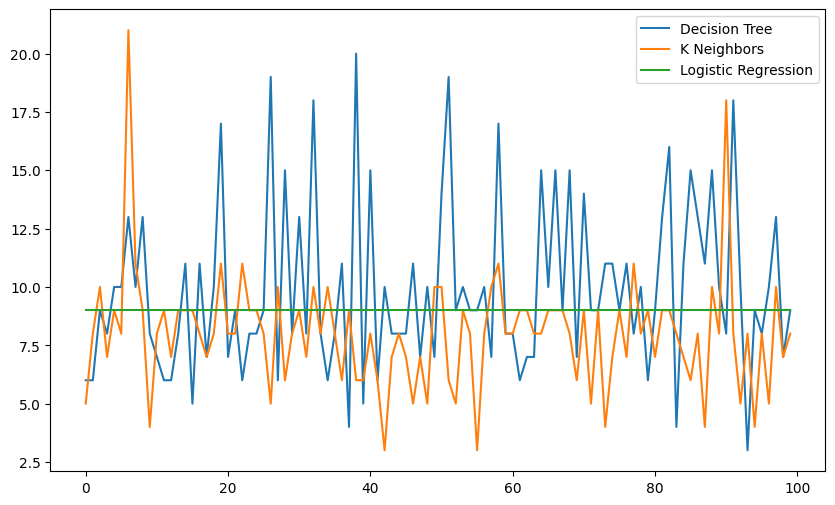

In [23]:
plot_predictions(models, 100)

In [24]:
# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[6. 6. 9. ... 9. 9. 8.]


In [25]:
len(final_pred)

18123

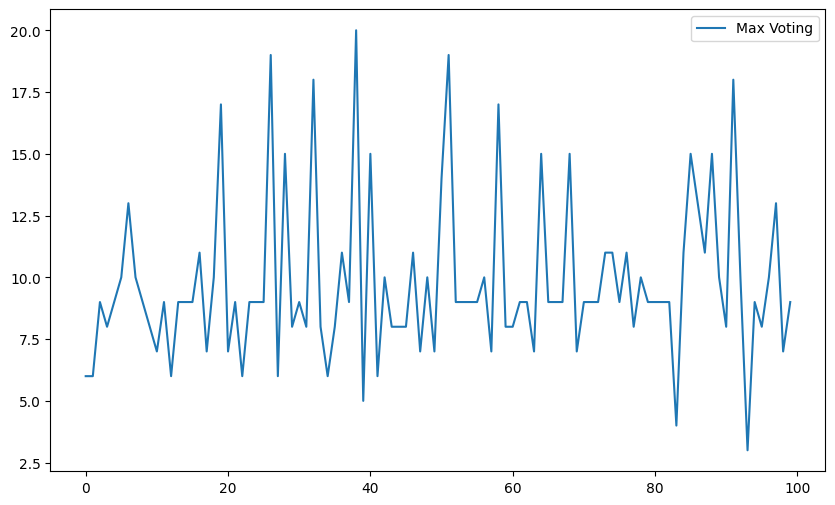

In [26]:
final_model1 = [{"predictions": final_pred, "name": "Max Voting"} ]
plot_predictions(final_model1, 100)

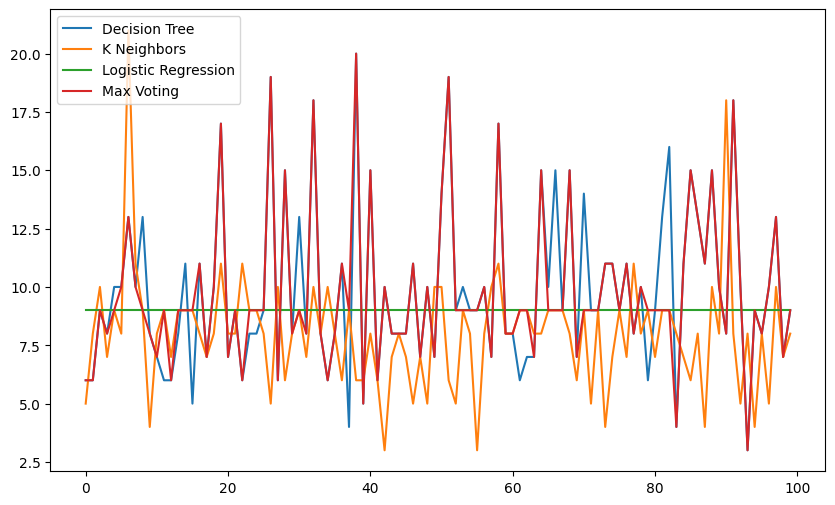

In [27]:
combo1 = models + final_model1
plot_predictions(combo1, 100)

Caution: The next block redfines models 1 and 2

In [33]:
models[0]['predictions']

array([ 6,  6,  9, ..., 11,  5,  8])

In [31]:
from sklearn.ensemble import VotingClassifier


model = VotingClassifier(estimators=[('lr', models[0]["predictions"]), ('dt', models[0]["predictions"])], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Now trying averaging:

In [29]:
pred1a=model1.predict_proba(x_test)
pred2a=model2.predict_proba(x_test)
pred3a=model3.predict_proba(x_test)

finalpreda=(pred1a+pred2a+pred3a)/3

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Note how this does not really work, as the probabilities returned are a distribution, not a single value:
https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972

In [ ]:
final_model1a = [{"predictions": pred1a, "name": "Averaging"} ]
plot_predictions(final_model1a, 100)

Introducing the evaluations and code used in my previous submission